In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import os

GENERATION

In [2]:
df_P_stats = pd.read_csv("P_stats.csv")
df_P= pd.read_csv("P.csv")
df_WS= pd.read_csv("WS.csv")
df_WS_stats= pd.read_csv("WS_stats.csv")
df_P['time'] = pd.to_datetime(df_P['time'], utc=True) 

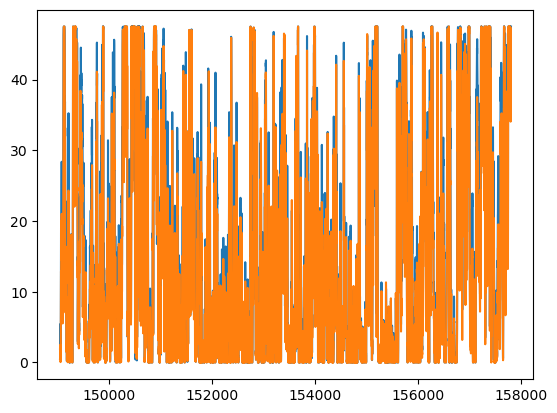

115581.83000000007 2311.373435541896 0.2631644581056468 439200


In [71]:
def filter_on_year(df: pd.DataFrame, year: int):
    """This functions filters a dataframe on a year using the utc_timestamp column.

    Args:
        year (int): year e.g. 2017
    Return:
        df: a dataframe filter on the year parameter
    """
    return df[df['time'].dt.year == year]

sel_year= 2017
# sel_year= range(2017,2018)
# for year in sel_year:
df_sel_year= filter_on_year(df=df_P, year=sel_year)
# print(df_2012)

# DE4-S_LW
# PL_LW13

plt.plot(df_sel_year.index, df_sel_year['BFH_LW_1']*50)
plt.plot(df_sel_year.index, df_sel_year['BFH_LW']*50)
plt.show()

Pow_out= sum(df_sel_year['BFH_LW']*50)
P_rated= 50
Ann_max_pow_out= P_rated*8784
CF=  (Pow_out/ Ann_max_pow_out)
FLH= CF*8783
print(Pow_out, FLH, CF, Ann_max_pow_out)

ECONOMICAL ANALYSIS

In [72]:
df = pd.read_csv("time_series_60min_singleindex.csv")
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], utc=True)


In [103]:
def filter_on_year(df: pd.DataFrame, year: int):
    """This functions filters a dataframe on a year using the utc_timestamp column.

    Args:
        year (int): year e.g. 2017
    Return:
        df: a dataframe filter on the year parameter
    """
    return df[df['utc_timestamp'].dt.year == year]

def vre_share(df_vre: pd.DataFrame, country: str = "DE", year_vre: int = 2017):
    """it calculates the VRE for a country.

    Args:
        df (pd.DataFrame): df filtered on a year.
        country (str, optional): country code for dataframe column. Defaults to "DE".
        year_vre (int): the year for the vre

    Returns:
        _type_: _description_
    """
    # GERMANTY 2017: base example
    df_vre = filter_on_year(df=df_vre, year=year_vre)
    x=df_vre['utc_timestamp']
    y1 =df_vre[f"{country}_wind_offshore_generation_actual"]
    y2 =df_vre[f"{country}_wind_onshore_generation_actual"]
    y3 =df_vre[f"{country}_solar_generation_actual"]

    VRE_sum = y1+y2+y3
    arr_VRE_sum_avg = np.full_like(VRE_sum, VRE_sum.mean())
    # arr_VRE_sum_avg[17545:26305+1] = VRE_sum_avg
    y4 = arr_VRE_sum_avg
    
    # plt.stackplot(x, y1, y2, y3, labels=['Off', 'On', 'Sol'])
    # plt.title(f'VRE generation in {country} in {year_vre}')
    # plt.xlabel('Time[h]')
    # plt.ylabel('Power [MW]')
    # plt.legend(loc='upper left')
    # plt.show()
    
    # plt.plot(x, y4, label = "Qavg")
    # plt.plot(x, VRE_sum)
    # plt.title(f'VRE generation in {country} in {year_vre}')
    # plt.xlabel('Time[h]')
    # plt.ylabel('Power [MW]')
    # plt.legend(loc='upper left')
    # plt.show()
    
    Q_p= VRE_sum-arr_VRE_sum_avg
    Q_tot= VRE_sum
    # print(Q_p)
    # plt.plot(Q_p)
    # plt.show()
    # VRE_sum = pd.Series(y1) + pd.Series(y2) + pd.Series(y3)
    
    return Q_tot  #, VRE_sum_avg #if i put the ys, it returns a list

# for year in range(2017,2018):
year = 2017
Q_tot_DE = vre_share(df_vre=df, country= "DE", year_vre=year)
Q_tot_DK_2= vre_share(df_vre=df, country= "DK_2", year_vre=year)

# VRE_sum_de = vre_share(df_vre=df, country= "DE", year_vre=year)

def vre_var_share(df_vre: pd.DataFrame, country: str = "DE", year_vre: int = 2017):
    """it calculates the Q_p for a country.

    Args:
        df (pd.DataFrame): df filtered on a year.
        country (str, optional): country code for dataframe column. Defaults to "DE".
        year_vre (int): the year for the vre

    Returns:
        _type_: _description_
    """
    # GERMANTY 2017: base example
    df_vre = filter_on_year(df=df_vre, year=year_vre)
    x=df_vre['utc_timestamp']
    y1 =df_vre[f"{country}_wind_offshore_generation_actual"]
    y2 =df_vre[f"{country}_wind_onshore_generation_actual"]
    y3 =df_vre[f"{country}_solar_generation_actual"]

    VRE_sum = y1+y2+y3
    arr_VRE_sum_avg = np.full_like(VRE_sum, VRE_sum.mean())
    # arr_VRE_sum_avg[17545:26305+1] = VRE_sum_avg
    y4 = arr_VRE_sum_avg
    
    # plt.stackplot(x, y1, y2, y3, labels=['Off', 'On', 'Sol'])
    # plt.title(f'VRE generation in {country} in {year_vre}')
    # plt.xlabel('Time[h]')
    # plt.ylabel('Power [MW]')
    # plt.legend(loc='upper left')
    # plt.show()
    
    # plt.plot(x, y4, label = "Qavg")
    # plt.plot(x, VRE_sum)
    # plt.title(f'VRE generation in {country} in {year_vre}')
    # plt.xlabel('Time[h]')
    # plt.ylabel('Power [MW]')
    # plt.legend(loc='upper left')
    # plt.show()
    
    Q_p= VRE_sum-arr_VRE_sum_avg
    Q_tot= VRE_sum
    # print(Q_p)
    # plt.plot(Q_p)
    # plt.show()
    # VRE_sum = pd.Series(y1) + pd.Series(y2) + pd.Series(y3)
    
    return Q_p  #, VRE_sum_avg #if i put the ys, it returns a list

year=2017
loc= 'DE'
Q_p_out= vre_var_share(df_vre=df, country= loc, year_vre=year)
Q_p_sum= sum(Q_p_out)
Q_p_min= min(Q_p_out)
Q_p_max= max(Q_p_out)
print(Q_p_sum, Q_p_min, Q_p_max)
# h= np.array(range(1,8760))
# print(h)
# plt.plot(h,Q_p_out[0])
# Q_p_out.index, 
# plt.plot(Q_p_out)
# plt.show()



-3.7172503652982414e-07 -15504.652283105022 36111.347716894976


In [74]:
df_SP = pd.read_excel("Demand_Renewable_Share_Loc_6.xlsx", sheet_name="DE_2017", usecols=["Date (GMT+1)", "Day Ahead Auction"])
df_SP["Date (GMT+1)"] = pd.to_datetime(df_SP["Date (GMT+1)"])
# convert from GMT+1 to UTC by subtracting one hour
df_SP["Date (UTC)"] = df_SP["Date (GMT+1)"] - pd.Timedelta(hours=1)
df_SP.drop("Date (GMT+1)", axis=1, inplace=True)

In [75]:
def normalized_vre(vre):
    """normalizes the VRE generation with max"""
    norm_VRE = vre / np.max(vre)
    # vre? array with VRE gen
    return norm_VRE

def normalized_spot(df_spot: pd.DataFrame):
    """normalizes with mean"""
    sp=df_spot["Day Ahead Auction"].drop(0)
    norm_SP=sp/sp.mean()
    
    return norm_SP

# year= 2017
# VRE_sum_de = vre_share(df_vre=df, country= "DE", year_vre=year)
# VRE_sum_dk_2= vre_share(df_vre=df, country= "DK_2", year_vre=year)

# VRE_sum_de_norm = normalized_vre(VRE_sum_de)
# VRE_sum_dk_2_norm = normalized_vre(VRE_sum_dk_2)



Correlation coefficient: 0.8386300123408862


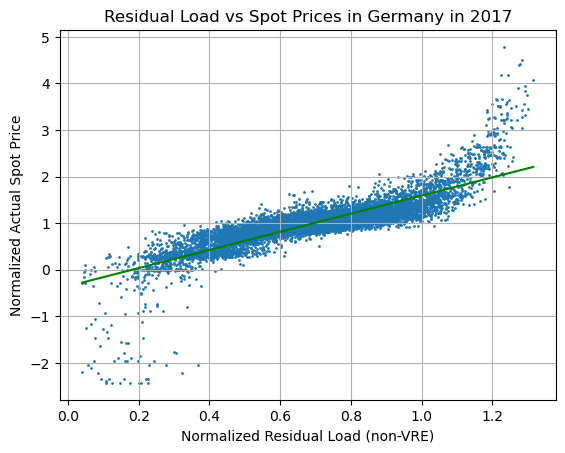

Slope: 1.9461474610076168
Intercept: -0.3533740500847062


In [76]:
Q_tot_DE_norm= normalized_vre(Q_tot_DE)
df_SP_norm = normalized_spot(df_SP)

# Residual Demand is the Demand
df_load_DE_2017 = pd.read_excel("Demand_Renewable_Share_Loc_6.xlsx", sheet_name="DE_2017", usecols=["Date (GMT+1)", "Load"])
df_load_DE_2017["Date (GMT+1)"] = pd.to_datetime(df_load_DE_2017["Date (GMT+1)"])
# convert from GMT+1 to UTC by subtracting one hour
df_load_DE_2017["Date (UTC)"] = df_load_DE_2017["Date (GMT+1)"] - pd.Timedelta(hours=1)
df_load_DE_2017.drop("Date (GMT+1)", axis=1, inplace=True)
load_DE_2017=df_load_DE_2017["Load"].drop(0)
avg_load_DE_2017= np.mean(load_DE_2017)
avg_load_DE_2017
norm_load_DE_2017=load_DE_2017/avg_load_DE_2017
list1= norm_load_DE_2017.tolist()
arr1 = np.array(list1)
# norm_VRE_sum
# arr_VRE.tolist()
# load_DE_2017.drop("Date (UTC)").tolist()
list2= Q_tot_DE_norm.tolist()
arr2 = np.array(list2)
norm_Res_Load_VRE= arr1 - arr2
norm_Res_Load_VRE

# with real data

x= norm_Res_Load_VRE.tolist()
y= df_SP_norm.tolist()

# calculate correlation coefficient
corr_coef = np.corrcoef(x, y)[0][1]

# display correlation coefficient
print("Correlation coefficient:", corr_coef)

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
plt.title('Residual Load vs Spot Prices in Germany in 2017')
plt.xlabel('Normalized Residual Load (non-VRE)')
plt.ylabel('Normalized Actual Spot Price')
plt.scatter(x, y,s=1)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.grid(True)
plt.show()

# Fit a first-degree polynomial to the data
fit = np.polyfit(x, y, 1)

# Print the coefficients of the polynomial
print("Slope:", fit[0])
print("Intercept:", fit[1])

COSTS CALCULATIONS

In [102]:
# CAPEX INPUT FROM PAPER: from WISDEM and then multiply by scaling factor according to DEA by 1.296 and according to Cost of Wind Energy review:
# 2017 paper: this would be the approximation that would have been done for a wind farm in that year (by 67.95%) - as that would be how much of the total costs would correspond to the turbine out of all the CAPEX


# 2021 paper: most recent paper: use it as base for future. Assumption of increase or decrease for 2025, 2035 adn 2045 as in paper (by 68,6%)
# from Table A.3 Appendix A, the avg capex in MEur/MW for years 2025, 2035, 2045:
on_CAPEX_fut = [1855000, 1675000, 1540000] # Eur/MW - I have the total MW per year
lifetime= 25 
# ann_on_CAPEX_fut = on_CAPEX_fut/lifetime
ann_on_CAPEX_fut = [capex / lifetime for capex in on_CAPEX_fut]
off_CAPEX_fut = [2, 1.8, 1.8]
# for extreme scenarios i will use the min and max values of CaPex provided
on_VarOPEX = [1.47, 1.40, 1.22] # Eur/MWh - full load hours?
on_FixOPEX= [13720, 12350, 11360] # Eur/MW/yr - I have the total MW per year

# Annual_Investment = ann_on_CAPEX_fut[1]/ sum(df_sel_year['BFH_LW'])
# sum(df_P['BFH_LW'])
# on_CAPEX_2025= on_CAPEX_fut[1]
# inst_cap = 50 #MW
AEP= sum(np.array(df_sel_year['BFH_LW'])*50)
# costs= (np.array(ann_on_CAPEX_fut[0])*inst_cap + np.array(on_FixOPEX[0])*inst_cap)
operating_cost = np.array(on_FixOPEX)*50  # EUR/year
capital_cost = (np.array(on_CAPEX_fut)*50) /25   # EUR
costs= operating_cost[0] + capital_cost[0]
LCOE_BFH_2025_HH100= costs/ AEP

# positive slope means a decrease in price will happen as deamnd goes to 0 (we can see it proved in the graph)
# # with std. p: p = mD + (1- m) -mQ'

Max_Pow_Out= 50*8760
CF= AEP/Max_Pow_Out
CF
LCOE_BFH_2025_HH100

38.03365978891316

38.03365978891316 -228.9036664915759


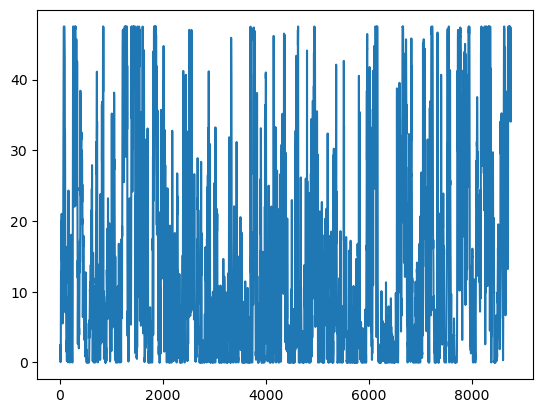

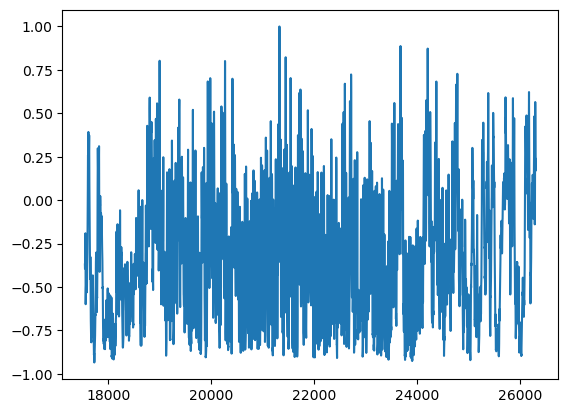

In [134]:
Q_tot_DE_norm= normalized_vre(Q_tot_DE)
Q_p_DE_norm= normalized_vre(Q_p_out)
operating_cost = np.array(on_FixOPEX)*50  # EUR/year
capital_cost = (np.array(on_CAPEX_fut)*50) /25   # EUR
costs= operating_cost[0] + capital_cost[0]

m_2017= 1.946147
# m_2017= 0

#  EQUATION FOR NORMALIZED PRICE
p_DE_2017= m_2017*Q_tot_DE_norm +(1-m_2017) 
# p_DE_2017= m_2017*Q_tot_DE_norm +(1-m_2017) - m_2017*Q_p_DE_norm


# COVE_BFH_DE_2017= costs/ (AEP*p_DE_2017)
AEP= sum(np.array(df_sel_year['BFH_LW'])*50)
h_AEP= np.array(df_sel_year['BFH_LW']*50)

Gen_COVE= sum(h_AEP*p_DE_2017)


COVE_BFH_DE_2017= costs/(Gen_COVE)
LCOE_BFH_DE_2017= (costs/AEP)
print(LCOE_BFH_DE_2017, COVE_BFH_DE_2017)
# p_DE_2017

plt.plot(h_AEP)
plt.show()
plt.plot(p_DE_2017)
plt.show()

In [82]:
# ALTERNATIVE LCOE 1
from lcoe.lcoe import lcoe

# def lcoe_calculator(OpEx, CapEx, WACC, LF, AEO):
#     return lcoe(AEO, CapEx, OpEx, WACC, LF)

# operating_cost = 25000000  # $ million/year
# capital_cost = 500000000  # $ million
# discount_rate = 0.07  # %
# lifetime = 20
# # annual_output = 2000000000  # kWh
# annual_output = 2000000  # MWh

# result = lcoe_calculator(operating_cost, capital_cost, discount_rate, lifetime, annual_output)
# print("LCOE:", result)

def lcoe_calculator(OpEx, CapEx, WACC, LF, AEO):
    return lcoe(AEO, CapEx, OpEx, WACC, LF)

operating_cost = np.array(on_FixOPEX)*50  # EUR/year
capital_cost = (np.array(on_CAPEX_fut)*50) # EUR
# discount_rate = 0.07  # %
discount_rate = 0.06  # %
lifetime = 25
# annual_output = 2000000000  # kWh
annual_output = sum(np.array(df_sel_year['BFH_LW'])*50) #MW 

result = lcoe_calculator(operating_cost, capital_cost, discount_rate, lifetime, annual_output)
print("LCOE:", result)




1566175.1202132998
LCOE: [65.15589729 58.81675975 54.07862887]


In [68]:
# problem found: the dataframe is from year 2000 to 2021 and i just want one year
sel_year= 2017
df_sel_year= filter_on_year(df=df_P, year=sel_year)
plt.plot(np.array(df_sel_year['Zary_LW_1'])*50)
plt.show()

KeyError: 'utc_timestamp'